In [1]:
import pandas as pd

In [2]:
Hour=pd.read_csv('/Users/syandra/Downloads/Bike-Sharing-Dataset/hour.csv')

In [3]:
Hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [34]:
Hour_dummies=pd.get_dummies(Hour['season'],drop_first=True)

In [35]:
Hour_dummies.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [42]:
Hourly_curated= pd.concat([Hour,Hour_dummies], axis=1)

In [4]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Hourly_curated)

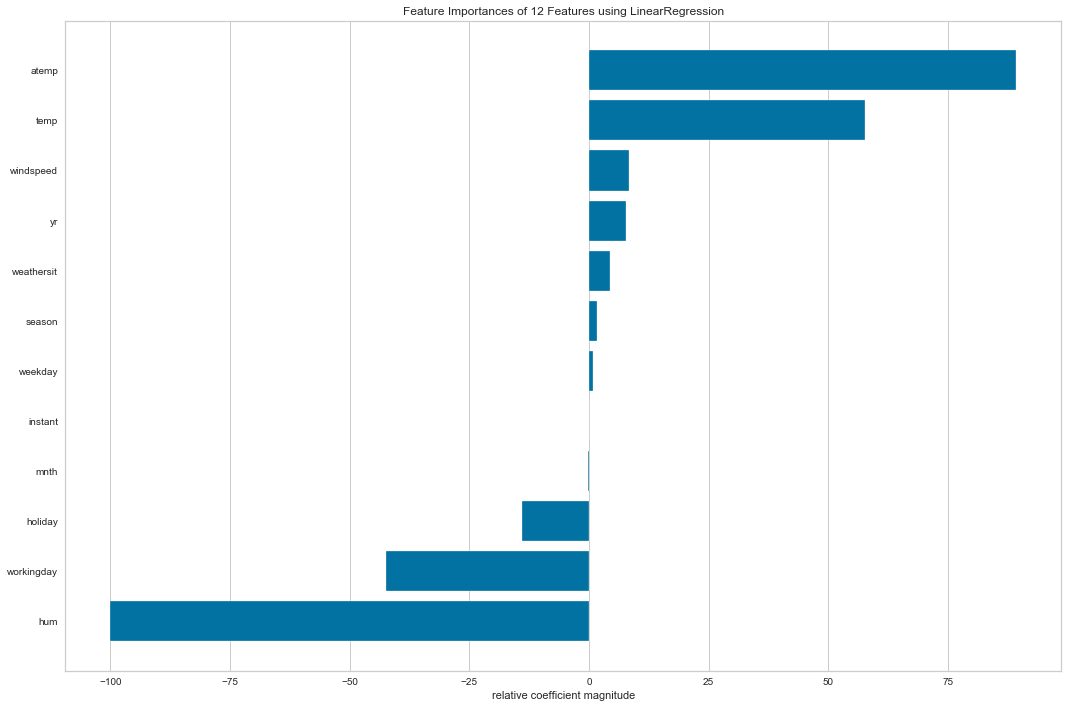

In [43]:
from sklearn.linear_model import LinearRegression
from yellowbrick.features import FeatureImportances

model = LinearRegression()
viz = FeatureImportances(model, size=(1080, 720))

Features=['instant','season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']

Target=['casual']

viz.fit(Hourly_curated[Features], Hourly_curated[Target])
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.poof()


In [44]:

# create training and testing vars
#X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
#print X_train.shape, y_train.shape
#print X_test.shape, y_test.shape

reg = LinearRegression().fit(Hourly_curated[Features], Hourly_curated[Target])
reg.score(Hourly_curated[Features], Hourly_curated[Target])


0.4304470353454308

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(Hourly_curated[Features], Hourly_curated[Target], test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


model = Ridge()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

(13903, 11) (13903, 1)
(3476, 11) (3476, 1)


0.2510678752963761

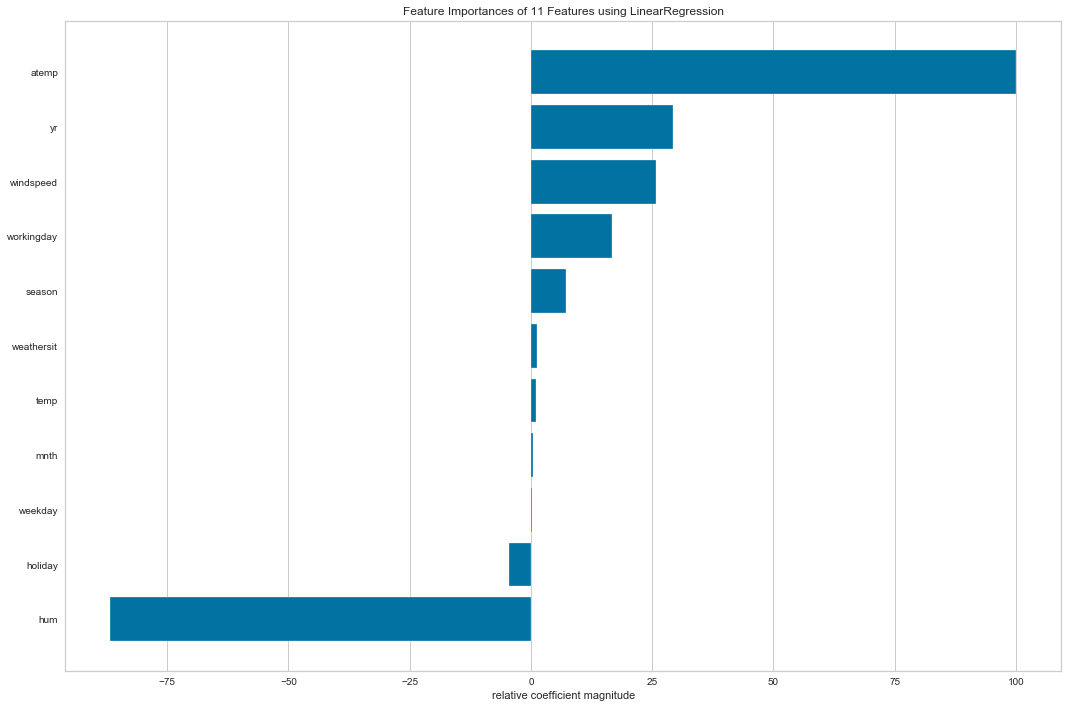

In [46]:
from sklearn.linear_model import LinearRegression
from yellowbrick.features import FeatureImportances

model = LinearRegression()
viz = FeatureImportances(model, size=(1080, 720))

Features=['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']

Target=['registered']

viz.fit(Hourly_curated[Features], Hourly_curated[Target])
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.poof()

In [47]:
reg = LinearRegression().fit(Hourly_curated[Features], Hourly_curated[Target])
reg.score(Hourly_curated[Features], Hourly_curated[Target])


0.25779899251266647

/Users/syandra/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


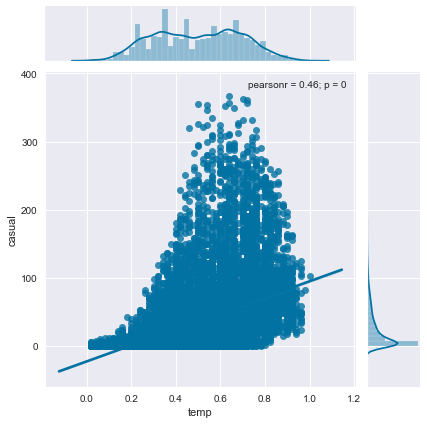

/Users/syandra/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


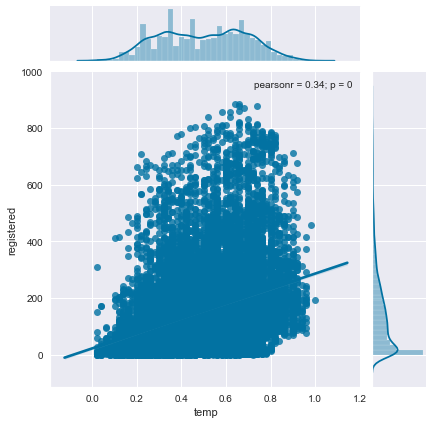

/Users/syandra/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


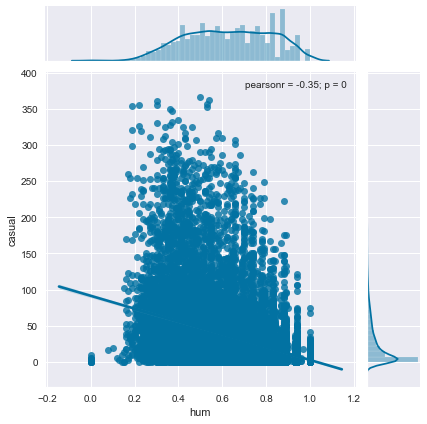

/Users/syandra/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


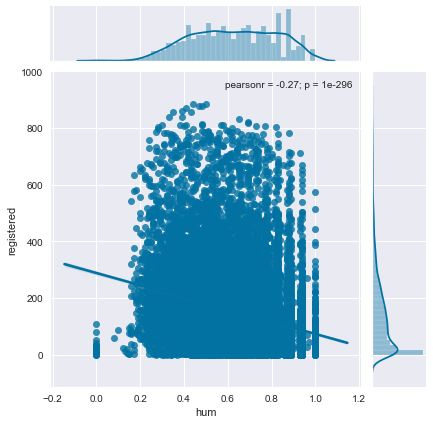

In [60]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')
# Casual versus registered, by season and working day
Hourly_curated[['season', 'workingday', 'casual', 'registered', 'cnt']].groupby(['season','workingday']).sum()

g=sns.jointplot(x='temp', y='casual', data=Hourly_curated, kind='reg')
g.annotate(stats.pearsonr)
plt.show()

g=sns.jointplot(x='temp', y='registered', data=Hourly_curated, kind='reg')
g.annotate(stats.pearsonr)
plt.show()

g=sns.jointplot(x='hum', y='casual', data=Hourly_curated, kind='reg')
g.annotate(stats.pearsonr)
plt.show()

g=sns.jointplot(x='hum', y='registered', data=Hourly_curated, kind='reg')
g.annotate(stats.pearsonr)
plt.show()